**K_means Test**


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [ ]:
dataset = pd.read_csv('/content/Cost_of_Living_Index_by_Country_2024.csv',index_col='Rank')

In [ ]:
dataset.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rank,,,,,,,
1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 1 to 121
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         121 non-null    object 
 1   Cost of Living Index            121 non-null    float64
 2   Rent Index                      121 non-null    float64
 3   Cost of Living Plus Rent Index  121 non-null    float64
 4   Groceries Index                 121 non-null    float64
 5   Restaurant Price Index          121 non-null    float64
 6   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.6+ KB


In [ ]:
dataset.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [ ]:
dataset.isnull().sum()

,0
Country,0
Cost of Living Index,0
Rent Index,0
Cost of Living Plus Rent Index,0
Groceries Index,0
Restaurant Price Index,0
Local Purchasing Power Index,0


In [ ]:
X = dataset.iloc[:, [2,6]].values

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

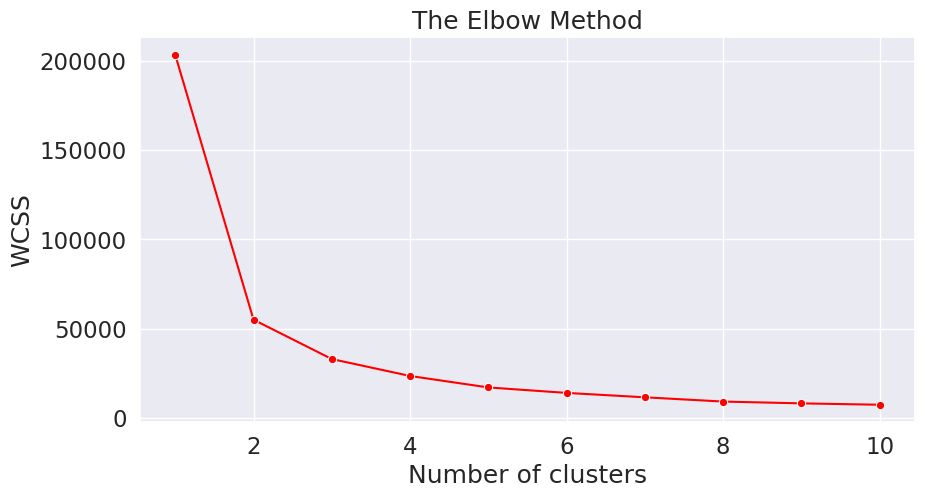

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


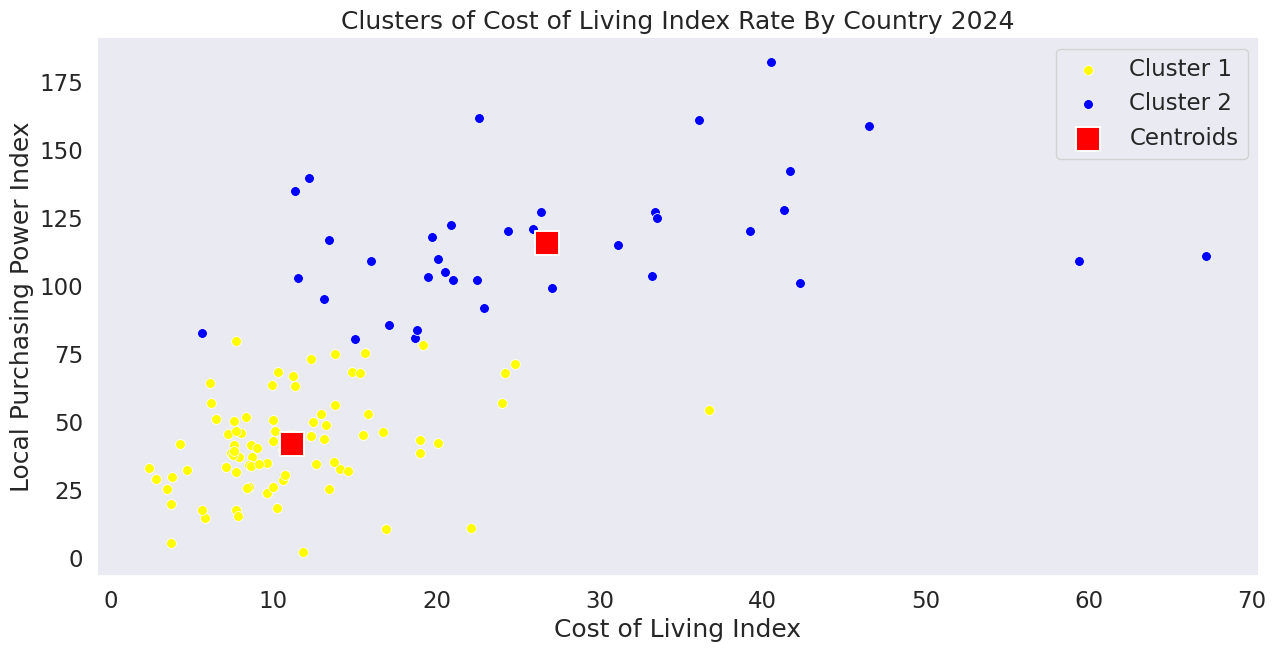

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0],y= kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Cost of Living Index Rate By Country 2024')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, y_kmeans)
print(score)

0.42709121317763377


**Dendrogram**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Cost_of_Living_Index_by_Country_2024.csv')
X = data.iloc[:,[2,6]].values

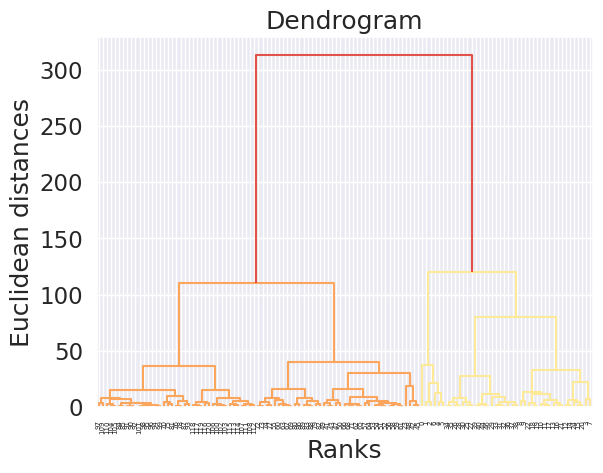

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
# The Ward method is a method that attempts to reduce variance within each cluster
plt.title('Dendrogram')
plt.xlabel('Ranks')
plt.ylabel('Euclidean distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


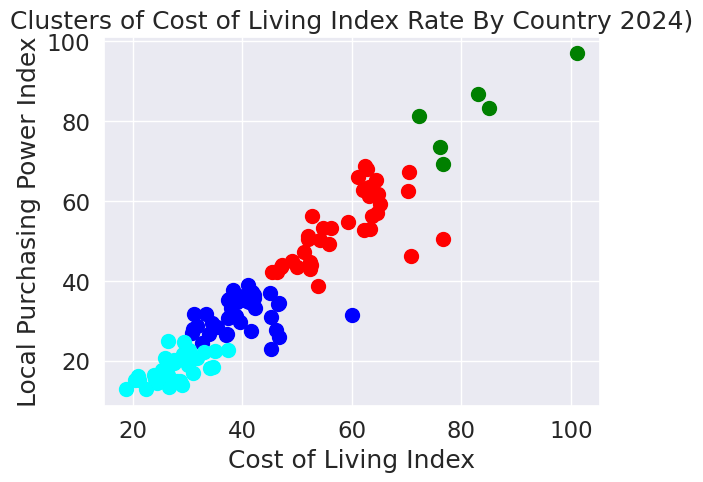

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(X)
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Cost of Living Index Rate By Country 2024)')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, y_hc)
print(score)

0.23211265685629937


**DB scan**

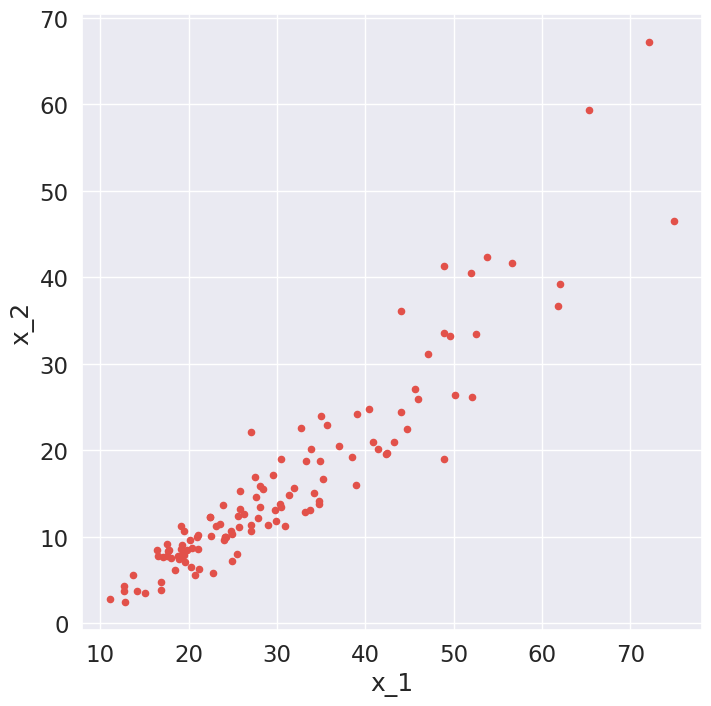

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame
dataset = pd.read_csv('/content/Cost_of_Living_Index_by_Country_2024.csv')
X = dataset.iloc[:, [4,3]].values


df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps = 1, min_samples = 5).fit(X)
cluster = clustering.labels_
len(set(cluster))

3

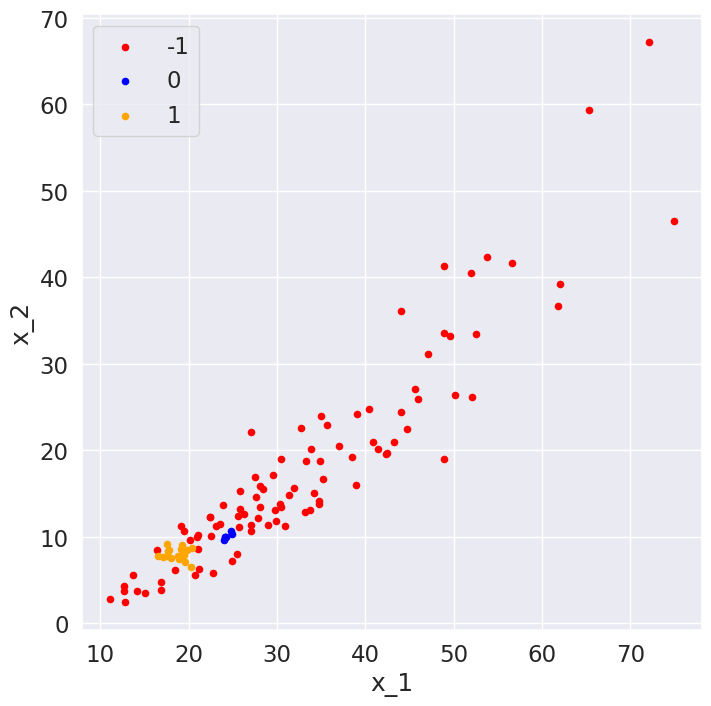

In [ ]:
def show_clusters(X, cluster):
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
  colors = {-1: 'red', 0: 'blue', 1:'orange'}
  fig, ax = plt.subplots(figsize=(8,8))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()
show_clusters(X,cluster)